# Gait in Parkinson's Disease

 





# Introduction

Parkinson’s disease (PD) is a progressive neurological condition that is caused by the
degeneration of neurons in the brain. These neurons play a significant role in controlling the movement and locomotion of the human body. PD patients normally have gait impariment that affects their daily activity.  

# Problem statement 

Currently, expert neurologist or clinicians commonly use UPDRS scale,  for monitoring and diagnosing the severity of disease. Gait is one of the measures of UPDRS, scored by clinical observations to determine the severity of disease and efficacy of treatment. The limitation of such studies is that these are subjective measures, can have bias induced by the clinician or neurologist who performs the test and can cause higher inter-rater variability and require excessive clinician time for the assessment. Hence, there is a need for quantifiable gait analysis to study PD patients.

Here, we are trying to classifly PD from Healthy subject(CO) based on machine learning algorithm.

This is a supervised classification task. 

Supervised classification: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features.

Here, we will try to classifly whether the subject is PD or not. 

This is a Binary classifcation problem (meaning we input the features and model predict the result as PD or CO)





# Hypothesis statement

 Here we will look into the all possible features which can help in prediction.
 
These are statements generated by looking into the features and not looking into the data. 

The 3 clincal scales(HoehnYahr, UPDRS, UPDRSM ) are only present for PD patients and for healthy subjects these values remains zero. Generally, these values increases with the severity of disease.

Timed Up and Go (TUAG): subjects with high TUAG have more chance to be PD.

Speed_10: Subject who walk with less speed have more chance to be PD. 

Speed_01: Subject who walk with less speed have more chance to be PD.

These are some of things that I think can affect the prediction, there can be more features as well. 


# Data description

This database contains measures of gait from 93 patients with idiopathic PD (PD) (mean age: 66.3 years; 63% men), and 73 healthy controls (CO) (mean age: 66.3 years; 55% men). 

The database includes the vertical ground reaction force records of subjects as they walked at their usual, self-selected pace for approximately 2 minutes on level ground. Underneath each foot were 8 sensors (Ultraflex Computer Dyno Graphy, Infotronic Inc.) that measure force (in Newtons) as a function of time. The output of each of these 16 sensors has been digitized and recorded at 100 samples per second, and the records also include two signals that reflect the sum of the 8 sensor outputs for each foot.

The details of the varaibles are given below:

ID----> subject ID

Ga, Ju or Si ------> indicate the study from which the data originated:
                    Ga - Galit Yogev et al (dual tasking in PD; Eur J Neuro, 2005)
                    Ju – Hausdorff et al (RAS in PD; Eur J Neuro, 2007)
                    Si - Silvi Frenkel-Toledo et al (Treadmill walking in PD; Mov Disorders,
                      2005)
                      
Group----> Control subject (CO) or a PD Patient (PD)
          
Subjnum: Subject number in the group 

Gender------> Male or female subject

Age----> Age of the subject

Height----> height of the subject

Weight ----> weight of the subject
          
HoehnYahr-----> clinical scale used to measure severity of disease. 

UPDRS----> clinical rating scale comprising of four parts- Part I assess the behavioral
problem, Part II assesses activities of daily living, Part III assesses motor examination and
Part IV covers complications of therapy. 

UPDRSM------> clinical rating scale considering only part III (motor examination) for evaluating motor symptoms in PD patients. 

Timed Up and Go (TUAG) ----> Measure of balance and lower extremity function

Speed_10 ----> indicates speed of a dual-task walking, where the subject was engaged in serial-7 subtraction while walking (only for Ga study group).

Speed_01 ---->indicates speed of normal walk.  


# Import required packages

In [240]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
The data was obtained form physionet (https://physionet.org/content/gaitpdb/1.0.0/#files-panel)


In [241]:
data = pd.read_csv('demographics.csv')

In [242]:
# prints first rows 
data.head()

,ID,Study,Group,Subjnum,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0,GaPt03,Ga,PD,3,female,82,1.45,50.0,3.0,20.0,10.0,36.34,NaN,0.778
1,GaPt04,Ga,PD,4,male,68,1.71,NaN,2.5,25.0,8.0,11.00,0.642,0.818
2,GaPt05,Ga,PD,5,female,82,1.53,51.0,2.5,24.0,5.0,14.50,0.908,0.614
3,GaPt06,Ga,PD,6,male,72,1.70,82.0,2.0,16.0,13.0,10.47,0.848,0.937
4,GaPt07,Ga,PD,7,female,53,1.67,54.0,3.0,44.0,22.0,18.34,0.677,0.579


In [243]:
# prints last rows to see the Co subjects
data.tail()

,ID,Study,Group,Subjnum,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
161,SiCo26,Si,CO,26,male,60,1.74,72.0,NaN,NaN,NaN,9.20,1.00,NaN
162,SiCo27,Si,CO,27,male,67,1.90,95.0,NaN,NaN,NaN,12.52,1.12,NaN
163,SiCo28,Si,CO,28,male,61,1.70,72.0,NaN,NaN,NaN,12.65,0.99,NaN
164,SiCo29,Si,CO,29,male,53,1.70,87.0,NaN,NaN,NaN,11.41,1.29,NaN
165,SiCo30,Si,CO,30,male,63,1.74,82.0,NaN,NaN,NaN,8.68,1.42,NaN


# Examine the data

In [244]:
data.describe()

,Subjnum,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
count,166.000000,166.000000,163.000000,163.000000,111.000000,135.000000,135.000000,153.000000,165.000000,20.000000
mean,16.469880,65.138554,57.634233,72.558282,1.891892,21.466667,13.177778,10.918235,1.125345,0.967450
std,9.549663,9.200070,78.790179,12.095861,0.892915,17.571942,10.871616,3.476727,0.213814,0.307002
min,1.000000,36.000000,1.450000,47.000000,0.000000,0.000000,0.000000,6.230000,0.360000,0.228000
25%,8.250000,59.000000,1.655000,64.000000,2.000000,1.000000,1.000000,8.940000,1.013000,0.793000
50%,16.000000,65.000000,1.740000,72.000000,2.000000,24.000000,14.000000,10.320000,1.144000,0.955000
75%,23.750000,71.000000,160.000000,80.000000,2.500000,33.000000,21.000000,11.990000,1.261000,1.189000
max,40.000000,86.000000,185.000000,105.000000,3.000000,70.000000,44.000000,36.340000,1.542000,1.532000


Descriptive statistcis is also known as five point summary( min, 25%, 50%, 75%, max). 
If we consider age of the subject- youngest age is 36, next quarter (25%) is between 36- 59, quarter(25%-50%) is between 59- 65, quarter (50-75%) is 65-71, max is 86. This is the distribution of age.  

Helps to understand:

count- total number of subject. Here, we can see that there many features (like UPDRS, SPEED_10, Hoehen Yahr were the count is less than 165. Meaning, there are few numbers that are not present in the data. This part can be handled during data cleaning)

mean- is the average age of the subject - 65 years

std (standard deviation)- variation in the data, spread of the varaition from the average of the data. 

IQR(interquartile range) = upper quartile (Q3)-lower quartile (Q1)

upper quartile (Q3) = 75% in the descriptive stat
lower quartile (Q1) = 25% in the descriptive stat

Here, we can draw a conclusion that half of the subject in the group are between 59 and 71 years of age. Thus, when we build a machine learning model, the subject belonging to the range of 59-71 years can predict the disease more accurately. 


Range = max- min = 86-36 years (combined age from PD and CO group)

Similarly, we can look at each features to get the five point summary output. 

More info on the stat: 

measure of location-median (sort from lowest to the highest, pick the middle out of it), median is the average age of the subject. 

measure of dispersion-IQR, RANGE, std

Varaiation in data -std(standard deviation), IQR



# Information about the data
tells about the kind of data available

integer(int)- represented in numbers
float - represents features with decimal values

object - there are categorical numbers 

Here, ID, study, Group and gender are categorical varaibles.

Group will be our target variable. 

In [245]:
data. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                166 non-null    object 
 1   Study             166 non-null    object 
 2   Group             166 non-null    object 
 3   Subjnum           166 non-null    int64  
 4   Gender            166 non-null    object 
 5   Age               166 non-null    int64  
 6   Height (meters)   163 non-null    float64
 7   Weight (kg)       163 non-null    float64
 8   HoehnYahr         111 non-null    float64
 9   UPDRS             135 non-null    float64
 10  UPDRSM            135 non-null    float64
 11  TUAG              153 non-null    float64
 12  Speed_01 (m/sec)  165 non-null    float64
 13  Speed_10          20 non-null     float64
dtypes: float64(8), int64(2), object(4)
memory usage: 18.3+ KB


Lets look at the rows and columns in the data 

In [246]:
data.shape

(166, 14)

Here we have 166 rows carrying information on the subjects and 14 features. 

As its a small database, we will have to retain all the rows. This point need to be considered when replacing null values in the dataset. 

# Data cleaning

Before starting any analysis on the data, it is important that the data cleaning step is performed. 

This helps to improve the accuracy and performance of the model. 

There are differnet data cleaning steps:

1. checking null values

Helps to find the NaN vlaues in the data.

there are differnt ways to handle NaN values:

a. remove the rows with NaN values
b. replace the NaN values with certain values

As we have small dataset, we will go with option b.

Replacing NaN vaues can be done by filling - 0, average value, median value etc.

Our case, filling NaN values with 0 will be more suitable as certain clinical scales (HoehnYahr, UPDRS, UPDRSM) are NaN for healthy subject. Or, simply these values are 0 for healthy person. 


In [247]:
data.isnull().sum()

ID                    0
Study                 0
Group                 0
Subjnum               0
Gender                0
Age                   0
Height (meters)       3
Weight (kg)           3
HoehnYahr            55
UPDRS                31
UPDRSM               31
TUAG                 13
Speed_01 (m/sec)      1
Speed_10            146
dtype: int64

<AxesSubplot:>

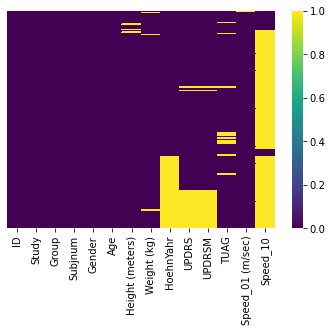

In [248]:
#lets visualise the null values
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

There are null vlaues in varaibles such as Height, weight, HoehnYahr, UPDRS, UPDRSM, TUAG, Speed_01 (m/sec),Speed_10 indicated by Yellow color

As said before clinical scales (HoehnYahr, UPDRS, UPDRSM) NaN values need to be replaced to 0.  

Inorder to decide on other features, to be filled with mean or median , the simple approach is to look at outliers. 

Before, moving on, lets delete the columns that are not required for further steps: Such as ID, study and Subjnum.


In [249]:
data = data.drop(columns = ['ID', 'Study', 'Subjnum'], axis = 1)
data

,Group,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0,PD,female,82,1.45,50.0,3.0,20.0,10.0,36.34,NaN,0.778
1,PD,male,68,1.71,NaN,2.5,25.0,8.0,11.00,0.642,0.818
2,PD,female,82,1.53,51.0,2.5,24.0,5.0,14.50,0.908,0.614
3,PD,male,72,1.70,82.0,2.0,16.0,13.0,10.47,0.848,0.937
4,PD,female,53,1.67,54.0,3.0,44.0,22.0,18.34,0.677,0.579
...,...,...,...,...,...,...,...,...,...,...,...
161,CO,male,60,1.74,72.0,NaN,NaN,NaN,9.20,1.000,NaN
162,CO,male,67,1.90,95.0,NaN,NaN,NaN,12.52,1.120,NaN
163,CO,male,61,1.70,72.0,NaN,NaN,NaN,12.65,0.990,NaN
164,CO,male,53,1.70,87.0,NaN,NaN,NaN,11.41,1.290,NaN


2. Outlier removal

Outliers are values that differs a lot from the data. Outliers can be observed in float or integer data types.

So first step to identifly outlier in data is to look at floadt and integer data types.

Then we can visualise the outlier using boxplot. 

In [250]:
#to find outlier- seperate the features that have int and float data type
data_sub = data.select_dtypes(["int64","float64"]).columns
data_sub

Index(['Age', 'Height (meters)', 'Weight (kg)', 'HoehnYahr', 'UPDRS', 'UPDRSM',
       'TUAG', 'Speed_01 (m/sec)', 'Speed_10'],
      dtype='object')

In [251]:
#Let's visualise these features

now lets see the 50 %, 95% and 99% values in the data. 

Data present above the whiskers are outliers and need to be removed.

Loc is a fucntion presetn in python, that helps in label based indexing using name of the column

In [252]:
data.loc[:,['Age', 'Height (meters)', 'Weight (kg)', 'HoehnYahr', 'UPDRS', 'UPDRSM','TUAG', 'Speed_01 (m/sec)', 'Speed_10']].quantile([0.5, 0.95, 0.99]) # quantile picks up the 50%, 95%, 99% quantile region so that we can see if the outlier. 0.5 is median, max- 0.99. 

,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0.50,65.00,1.74,72.0,2.0,24.00,14.00,10.3200,1.14400,0.95500
0.95,80.75,175.00,94.8,3.0,49.30,31.30,15.5040,1.43900,1.34770
0.99,82.70,182.38,101.0,3.0,60.62,35.32,25.1252,1.53872,1.49514


Any point outside the wiskers in the boxplot are considered as outliers (see https://datavizcatalogue.com/methods/box_plot.html)

Boxplot is the visual representation of minimum, maximum, median , upper quartile, lower quartile. 

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0


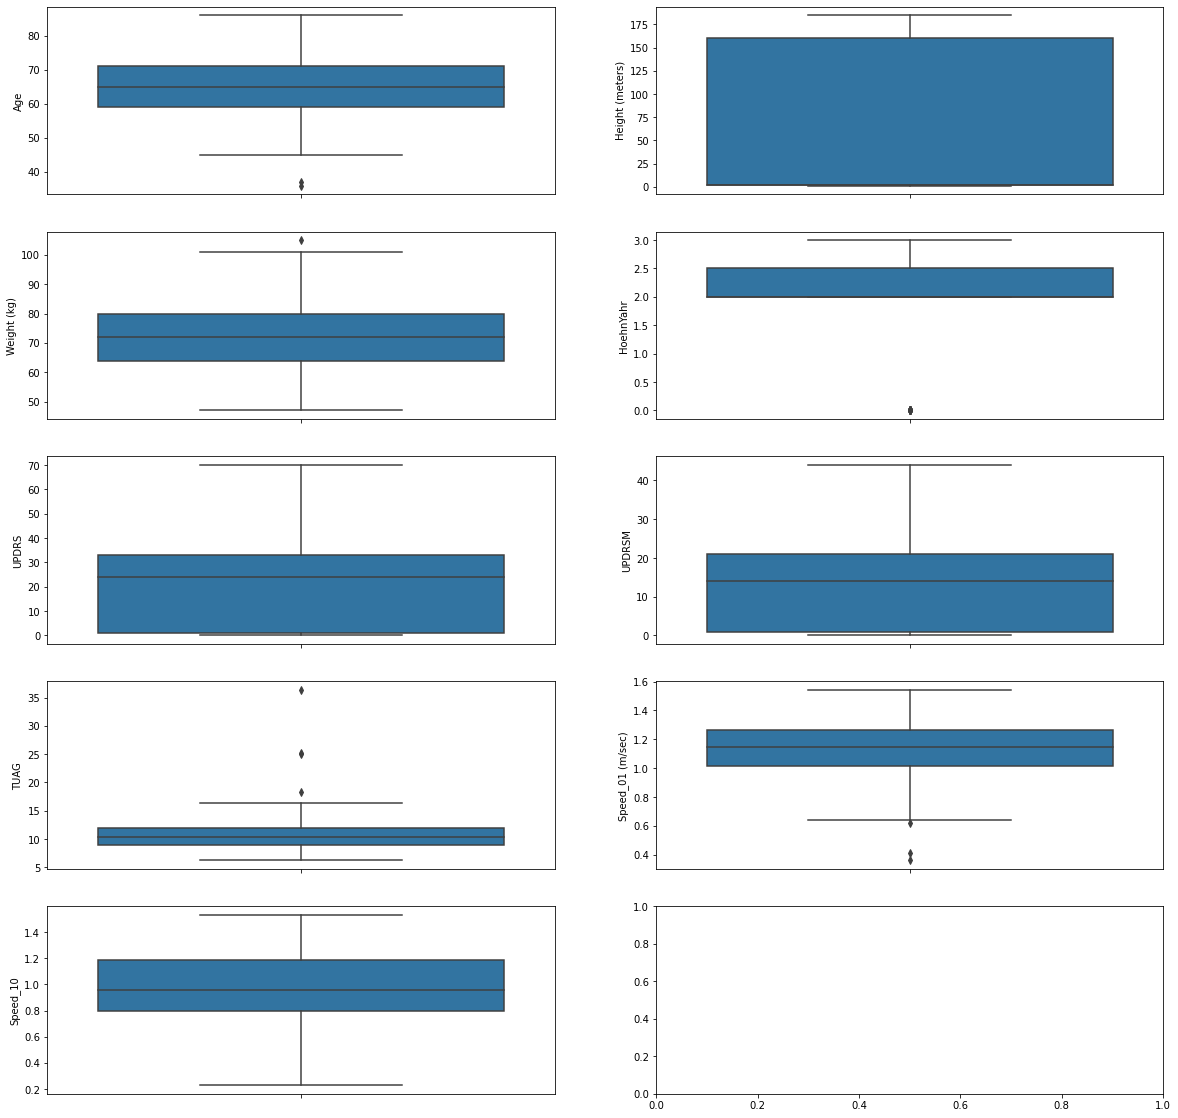

In [253]:
fig, axs=plt.subplots(nrows=5, ncols=2, figsize=(20,20))
for i in range(0, len(data_sub.values)):
    rows=i //2
    columns=i % 2
    print(rows, columns)
    ax=axs[rows, columns]
    sns.boxplot(y=data_sub[i], data=data, ax=ax)

Here we can see Age, weight, HoehnYahr, TUAG, Speed_01 (m/sec) have outliers present in the data. As seen before, Age doesn't have NaN values. So we will replace weight, TUAG, Speed_01 (m/sec) with median values of the data

So it is always best to fill null values with median, if outliers are present. 

The reason is median values are not affected by the presence of outliers. 



In [254]:
# replacing NaN values in HoehnYahr, UPDRS, UPDRSM with zero
data['UPDRS'] = data["UPDRS"].fillna(0)
data['HoehnYahr']=data['HoehnYahr'].fillna(0)
data['UPDRSM']=data['UPDRSM'].fillna(0)

In [255]:
# replacing NaN values in Weight, TUAG, Speed_01 (m/sec) with median value
data["Weight (kg)"].fillna(data["Weight (kg)"].median(),inplace=True)
data["TUAG"].fillna(data["TUAG"].median(),inplace=True)
data["Speed_01 (m/sec)"].fillna(data["Speed_01 (m/sec)"].median(),inplace=True)



In [256]:
# replacing NaN values in Height (meters) and Speed_10 with mean value
data["Height (meters)"].fillna(data["Height (meters)"].median(),inplace=True)
data["Speed_10"].fillna(data["Speed_10"].median(),inplace=True)

<AxesSubplot:>

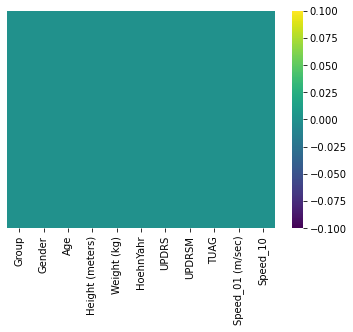

In [257]:
#lets visualise the null values again
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

#now we have removed null values


E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height (meters)', ylabel='Density'>

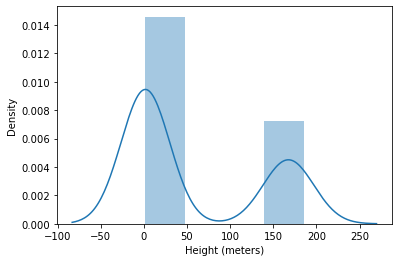

In [258]:
#univariate plot to visualise each features seperately
sns.distplot(data["Height (meters)"])

Here we can see there are certain heights in meters and others represented in cm

Either of the things can be done:

1. convert meters to cm
2. remove outliers




In [259]:
# lets see how many rows are above 100 

data_height = data[data['Height (meters)']> 100]
data_height
#there are few observaton above 100 and these can be converted to meters

#convert height in meters

data_height = data_height['Height (meters)'] / 100
pd.DataFrame(data_height)   

data.loc[data['Height (meters)'] > 100, 'Height (meters)'] = data['Height (meters)'] /100
data

,Group,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0,PD,female,82,1.45,50.0,3.0,20.0,10.0,36.34,1.144,0.778
1,PD,male,68,1.71,72.0,2.5,25.0,8.0,11.00,0.642,0.818
2,PD,female,82,1.53,51.0,2.5,24.0,5.0,14.50,0.908,0.614
3,PD,male,72,1.70,82.0,2.0,16.0,13.0,10.47,0.848,0.937
4,PD,female,53,1.67,54.0,3.0,44.0,22.0,18.34,0.677,0.579
...,...,...,...,...,...,...,...,...,...,...,...
161,CO,male,60,1.74,72.0,0.0,0.0,0.0,9.20,1.000,0.955
162,CO,male,67,1.90,95.0,0.0,0.0,0.0,12.52,1.120,0.955
163,CO,male,61,1.70,72.0,0.0,0.0,0.0,12.65,0.990,0.955
164,CO,male,53,1.70,87.0,0.0,0.0,0.0,11.41,1.290,0.955


E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height (meters)', ylabel='Density'>

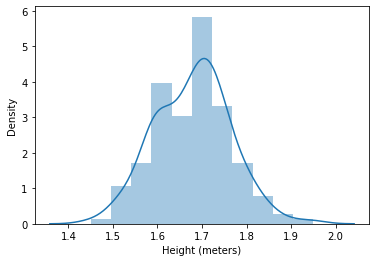

In [260]:
sns.distplot(data["Height (meters)"])

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

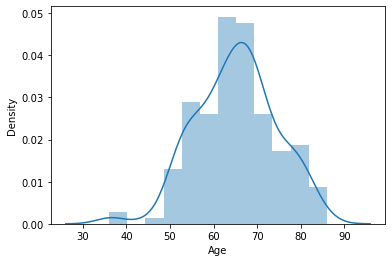

In [261]:
sns.distplot(data["Age"])

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight (kg)', ylabel='Density'>

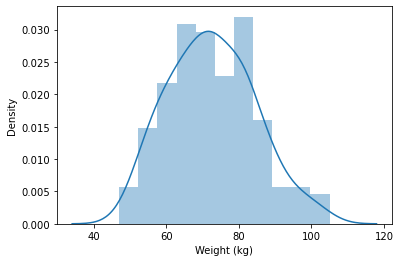

In [262]:
sns.distplot(data["Weight (kg)"])

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HoehnYahr', ylabel='Density'>

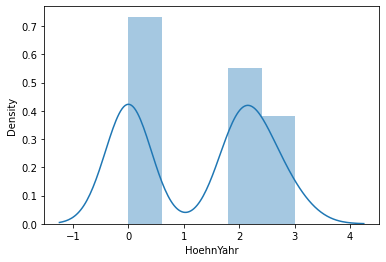

In [263]:
sns.distplot(data["HoehnYahr"])

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TUAG', ylabel='Density'>

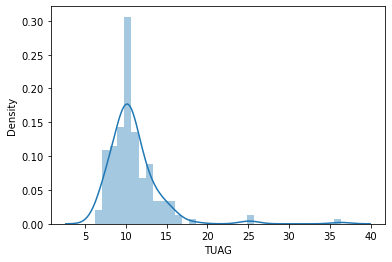

In [264]:
sns.distplot(data["TUAG"])

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UPDRS', ylabel='Density'>

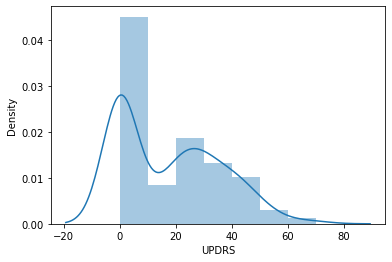

In [265]:
sns.distplot(data["UPDRS"])

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Speed_01 (m/sec)', ylabel='Density'>

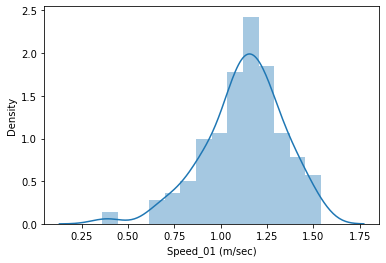

In [266]:
sns.distplot(data["Speed_01 (m/sec)"])

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Speed_10', ylabel='Density'>

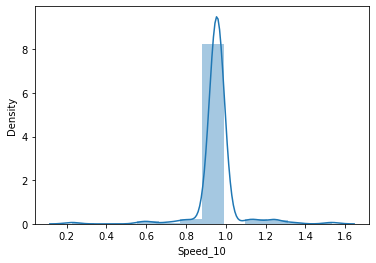

In [267]:
sns.distplot(data["Speed_10"])

Now lets remove the outliers in the data.

Normal data range is with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR.

Anything outside this range is outlier. 

So here we can consider anything above 90 quantile are outlier.

These are the features outliers are present - Age, weight, HoehnYahr, TUAG, Speed_01 (m/sec) as seen from Boxplot

Now we can look at the outliers present in the 50, 95, 99 percentile. 

From below dataframe, we can seen that 

Age: 50 % (median) and 99% (highest) are almost close and it will be very difficult to remove the outlier. 
But for Height, we can see the 50 % (median) and 99% (highest) are very differnt and these need to be removed. 

In [268]:
data.loc[:,['Age', 'Height (meters)', 'Weight (kg)', 'HoehnYahr', 'UPDRS', 'UPDRSM','TUAG', 'Speed_01 (m/sec)', 'Speed_10']].quantile([0.5, 0.95, 0.99]) # quantile picks up the 50%, 95%, 99% quantile region so that we can see if the outlier. 0.5 is median, max- 0.99. 

,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0.50,65.00,1.685,72.0,2.0,16.50,10.00,10.3200,1.14400,0.95500
0.95,80.75,1.815,94.5,3.0,47.50,29.75,15.4525,1.43825,1.06900
0.99,82.70,1.874,101.0,3.0,58.45,34.70,25.0940,1.53870,1.28275


In [269]:
# you can find quantile and remove outlier
data_1 = data.loc[data['Height (meters)']< data['Height (meters)'].quantile(0.90)]
data_2 = data.loc[data['TUAG']< data['TUAG'].quantile(0.90)]
data_3 = data.loc[data['Weight (kg)']< data['Weight (kg)'].quantile(0.90)]
data_4 = data.loc[data['Speed_01 (m/sec)']< data['Speed_01 (m/sec)'].quantile(0.70)]

<AxesSubplot:ylabel='Height (meters)'>

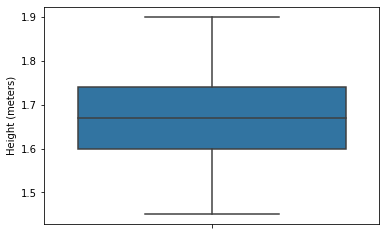

In [270]:
#lets see whether the outliers are removed

sns.boxplot(y=data_4['Height (meters)'])

Here from the plot the outliers in the height is removed. Similarly with other features as well 

Now we will work with data_4

In [271]:
#print subjects having weight and hoehnyahr rating less than 90 quantile

data_4.loc[(data_4['Weight (kg)']< data_4['Weight (kg)'].quantile(0.90)) & (data_4['HoehnYahr']< data_4['HoehnYahr'].quantile(0.90))]

,Group,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
3,PD,male,72,1.70,82.0,2.0,16.0,13.0,10.47,0.848,0.937
5,PD,female,68,1.63,57.0,2.0,15.0,8.0,10.11,1.046,0.228
8,PD,male,70,1.68,53.0,2.0,38.0,21.0,15.51,0.726,0.798
10,PD,male,81,1.74,80.0,2.0,33.0,20.0,10.32,0.948,0.899
11,PD,male,79,1.70,72.0,2.0,18.0,10.0,8.74,1.048,1.129
...,...,...,...,...,...,...,...,...,...,...,...
158,CO,male,53,1.70,76.0,0.0,0.0,0.0,8.94,1.160,0.955
159,CO,male,54,1.70,73.0,0.0,0.0,0.0,11.05,1.030,0.955
160,CO,male,57,1.76,80.0,0.0,0.0,0.0,9.16,1.130,0.955
161,CO,male,60,1.74,72.0,0.0,0.0,0.0,9.20,1.000,0.955


# Model building

After cleaning the data, next procedure is to split the dataset into training set and testing set.

Here group will be the target varaible. 

Group is a categorical variable, describing whether subject have PD or not.

Lets check the count of PD and CO in group. 


In [272]:
data_4["Group"].value_counts()

PD    81
CO    35
Name: Group, dtype: int64

There are 81 PD and 35 CO

# Pre-processing

In [273]:
#Pre-processing procedure declare the following variables:

#X as the Feature Matrix (data of data_4)
#y as the response vector (target)
X = data_4.drop(columns=['Group'])
X

,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0,female,82,1.45,50.0,3.0,20.0,10.0,36.34,1.144,0.778
1,male,68,1.71,72.0,2.5,25.0,8.0,11.00,0.642,0.818
2,female,82,1.53,51.0,2.5,24.0,5.0,14.50,0.908,0.614
3,male,72,1.70,82.0,2.0,16.0,13.0,10.47,0.848,0.937
4,female,53,1.67,54.0,3.0,44.0,22.0,18.34,0.677,0.579
...,...,...,...,...,...,...,...,...,...,...
159,male,54,1.70,73.0,0.0,0.0,0.0,11.05,1.030,0.955
160,male,57,1.76,80.0,0.0,0.0,0.0,9.16,1.130,0.955
161,male,60,1.74,72.0,0.0,0.0,0.0,9.20,1.000,0.955
162,male,67,1.90,95.0,0.0,0.0,0.0,12.52,1.120,0.955


In [274]:
y = data_4['Group']
y

0      PD
1      PD
2      PD
3      PD
4      PD
       ..
159    CO
160    CO
161    CO
162    CO
163    CO
Name: Group, Length: 116, dtype: object

# Convert categorical variable into dummy

Here “Gender” variable have two classes, Male and Female.

Mnay of the machine learning models takes only the numerical values as input, we have to change male and female into numerical value.

Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female),

one for each class, i.e. Male and Female.


Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [275]:
X = pd.get_dummies(X, columns=['Gender'])
X 

# we require only one column either- gender_female or male because it gives same meaning

#eg: if gender_feamle =1 , means subject is female. 
    
    #So we can remove gender_male column. This makes the model easy to learn with less number of features
    

,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10,Gender_female,Gender_male
0,82,1.45,50.0,3.0,20.0,10.0,36.34,1.144,0.778,1,0
1,68,1.71,72.0,2.5,25.0,8.0,11.00,0.642,0.818,0,1
2,82,1.53,51.0,2.5,24.0,5.0,14.50,0.908,0.614,1,0
3,72,1.70,82.0,2.0,16.0,13.0,10.47,0.848,0.937,0,1
4,53,1.67,54.0,3.0,44.0,22.0,18.34,0.677,0.579,1,0
...,...,...,...,...,...,...,...,...,...,...,...
159,54,1.70,73.0,0.0,0.0,0.0,11.05,1.030,0.955,0,1
160,57,1.76,80.0,0.0,0.0,0.0,9.16,1.130,0.955,0,1
161,60,1.74,72.0,0.0,0.0,0.0,9.20,1.000,0.955,0,1
162,67,1.90,95.0,0.0,0.0,0.0,12.52,1.120,0.955,0,1


In [276]:
X = X.drop(columns = ['Gender_male'])
X

,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10,Gender_female
0,82,1.45,50.0,3.0,20.0,10.0,36.34,1.144,0.778,1
1,68,1.71,72.0,2.5,25.0,8.0,11.00,0.642,0.818,0
2,82,1.53,51.0,2.5,24.0,5.0,14.50,0.908,0.614,1
3,72,1.70,82.0,2.0,16.0,13.0,10.47,0.848,0.937,0
4,53,1.67,54.0,3.0,44.0,22.0,18.34,0.677,0.579,1
...,...,...,...,...,...,...,...,...,...,...
159,54,1.70,73.0,0.0,0.0,0.0,11.05,1.030,0.955,0
160,57,1.76,80.0,0.0,0.0,0.0,9.16,1.130,0.955,0
161,60,1.74,72.0,0.0,0.0,0.0,9.20,1.000,0.955,0
162,67,1.90,95.0,0.0,0.0,0.0,12.52,1.120,0.955,0


# Spliting the dataset

train the model using the dataset, then to test the model using the testing samples

The two ways to train the data mentioned below:

*train-test split method - use some portion of data for training and rest for testing
Problem with this approach- it is appropiate for large dataset, may not split the groups equally while training and testing
* Cross validation method - divide total samples into k fold. And run mulitple iteration. use one fold for testing and other for training, find the individual scores, take the average.

Advtange: here we are feeding the model with variety of samples.

Here we are using Cross validation technique 

In [364]:
#first split the data and then divide train samples into k folds
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size = 0.2, random_state = 20)  #80% of data is used for training and rest 20% for testing

In [408]:
#Lets check the sample size for training and testing set
print("The shape of training set: ", X_trainset.shape)
print("The shape of testing set: ", X_testset.shape)

The shape of training set:  (92, 10)
The shape of testing set:  (24, 10)


As we have small dataser, there are only 94 samples during training set

Let normalise the data first, before starting the model

Normalisation is performed using StandardScaler.The process of converting all the feature values in the range of 0-1

This can increase the performance of the model.


In [413]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
sc1=StandardScaler()
X_trainset = sc1.fit_transform(X_trainset)
X_testset=sc1.transform(X_testset)

Next procedure is to find the best model for prediction

As this is a classification problem, the model that we will consider here are 
Logistic regression
Decision tree 
Random forest

So we need to find best model from these

Steps to find best model
- consider all taken model (here it is Logistic regression, Decision tree, Random forest )
- Perform validation on the training set
- Measure the mean error and standard deviation
- choose the model with lowest error

In [419]:
#we will find best model for the dataset
models = []
models.append(('LR', LogisticRegression(solver='liblinear', random_state=1)))
models.append(('DT', DecisionTreeClassifier(criterion = 'gini', random_state=1)))
models.append(('RD', RandomForestClassifier(criterion='entropy',random_state=1)))

In [420]:

result = dict()
for name, model in models:
    kfold =KFold(n_splits=2, random_state =2, shuffle=True)
    scores = cross_val_score(model,X_trainset,y_trainset,  cv=kfold)
    result[name] = (scores.mean(), scores.std())
    
    
print("name mean_error std_error")
for key, value in result.items():
    print(key, value)

name mean_error std_error
LR (0.9891304347826086, 0.010869565217391297)
DT (0.9782608695652174, 0.021739130434782594)
RD (0.9782608695652174, 0.021739130434782594)


So from the results, we will choose the model with less mean error and standard deviation. 
Based on that we can select the primary model to be DT or RD

Now lets fit the model and check the model on testing data

In [421]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
clf_1 = DecisionTreeClassifier(criterion = 'gini', random_state=1).fit(X_trainset,y_trainset)
#predicting our results
y_pred = clf_1.predict(X_testset)
#find the accuracy of the model
acc_1 = accuracy_score(y_testset,clf_1.predict(X_testset))
print('Accuracy is: ',acc_1)

Accuracy is:  1.0


In [422]:
clf_2 = RandomForestClassifier(criterion='entropy',random_state=1).fit(X_trainset,y_trainset)
#predicting our results
y_pred_2 = clf_2.predict(X_testset)
#find the accuracy of the model
acc_2 = accuracy_score(y_testset,clf_2.predict(X_testset))
print('Accuracy is: ',acc_2)

Accuracy is:  1.0


In [ ]:
Both the model gives an accuracy of 1 for the test set.

So here I have considered DT for further processing

In [423]:
#find the important parameter that have contributed for prediction

clf_1.feature_importances_


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

<AxesSubplot:>

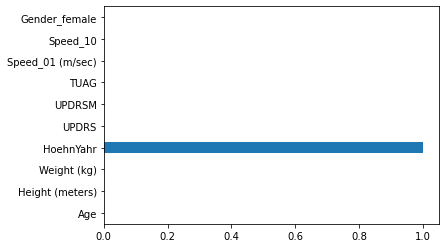

In [424]:
(pd.Series(clf_1.feature_importances_, index=X.columns).plot(kind='barh'))

Feature importance shows only Hoehnyahr have contributed for the classification and building of the model. 

All other features are thus not considered to be important for the classisfaction of PD from Co.  

In [425]:
from sklearn.metrics import classification_report
print("Classification report: \n", classification_report(y_testset, y_pred))

Classification report: 
               precision    recall  f1-score   support

          CO       1.00      1.00      1.00         8
          PD       1.00      1.00      1.00        16

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



Text(0.5, 1.0, 'Confusion Matrix')

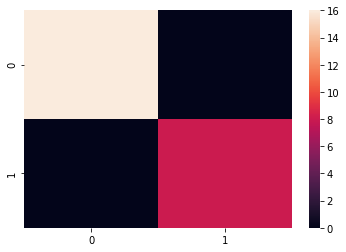

In [426]:
#lets find the confusion matirx
import seaborn as sn
cm_1 = confusion_matrix(y_testset,y_pred, labels=['PD','CO'])
cm_1
plt.figure()
sn.heatmap(cm_1)
ax.set_title('Confusion Matrix')